In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [177]:
df = pd.read_csv("/kaggle/input/obesity-prediction/Obesity prediction.csv")

# Data İnformation

In [178]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [180]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Categoric and Numeric Columns

In [181]:
categorical = [col for col in df.columns if df[col].dtype=='O']
numerical = [col for col in df.columns if df[col].dtype!='O']

In [182]:
print(categorical)

['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity']


In [183]:
print(numerical)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [184]:
for col in categorical: 
    print(df[col].value_counts())

Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


# Ordinal Encoding

In [185]:
# 2. Mantıksal sıralamayı tanımla (Düşükten yükseğe)
obesity_order = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]


# 3. Sözlük yapısını oluştur (Hangi metin hangi sayıya?)
obesity_mapping = {category: index for index, category in enumerate(obesity_order)}

# 4. Eşlemeyi uygula
df['Obesity'] = df['Obesity'].map(obesity_mapping)

# Kontrol edelim
print("Sıralama Eşleşmesi:")
print(obesity_mapping)

print("\nİlk 5 satır (Yeni hali):")
print(df[['Obesity']].head())

Sıralama Eşleşmesi:
{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

İlk 5 satır (Yeni hali):
   Obesity
0        1
1        1
2        1
3        2
4        3


In [186]:
# 2. Sıralama düzenini tanımlıyoruz (Azdan çoğa)
# Hem CAEC hem CALC aynı kategorileri paylaşıyor: no, Sometimes, Frequently, Always
frequency_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# 3. Ordinal Encoding uygulayalım
df['CAEC'] = df['CAEC'].map(frequency_mapping)
df['CALC'] = df['CALC'].map(frequency_mapping)



# One-Hot Encoding

In [187]:
# 2. MTRANS kolonu için One-Hot Encoding uygula
# prefix='Trans' diyerek yeni kolon isimlerini "Trans_Walking", "Trans_Public_Transportation" gibi yapıyoruz.
df = pd.get_dummies(df, columns=['MTRANS'], prefix='Trans')

# 3. Sonucu kontrol edelim
# Yeni oluşan kolonları filtreleyip ilk 5 satıra bakalım
trans_cols = [col for col in df.columns if col.startswith('Trans_')]
print("Yeni Oluşan Kolonlar:")
print(df[trans_cols].head())

Yeni Oluşan Kolonlar:
   Trans_Automobile  Trans_Bike  Trans_Motorbike  Trans_Public_Transportation  \
0             False       False            False                         True   
1             False       False            False                         True   
2             False       False            False                         True   
3             False       False            False                        False   
4             False       False            False                         True   

   Trans_Walking  
0          False  
1          False  
2          False  
3           True  
4          False  


# Label Encoding

In [188]:
from sklearn.preprocessing import LabelEncoder
# 2. Binary encoding uygulanacak kolonlar
binary_cols = ['Gender', 'family_history', 'FAVC', 'SMOKE', 'SCC']

# 3. LabelEncoder ile 0 ve 1'e dönüştürme
label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # İleride kullanmak için kaydediyoruz

# 4. Hangi değerin hangi sayıya dönüştüğünü kontrol edelim
for col in binary_cols:
    mapping = dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))
    print(f"{col} Eşleşmesi: {mapping}")

# Güncellenmiş verinin ilk 5 satırı
print("\nİşlem Sonrası Veri Seti:")
print(df[binary_cols].head())

Gender Eşleşmesi: {'Female': np.int64(0), 'Male': np.int64(1)}
family_history Eşleşmesi: {'no': np.int64(0), 'yes': np.int64(1)}
FAVC Eşleşmesi: {'no': np.int64(0), 'yes': np.int64(1)}
SMOKE Eşleşmesi: {'no': np.int64(0), 'yes': np.int64(1)}
SCC Eşleşmesi: {'no': np.int64(0), 'yes': np.int64(1)}

İşlem Sonrası Veri Seti:
   Gender  family_history  FAVC  SMOKE  SCC
0       0               1     0      0    0
1       0               1     0      1    1
2       1               1     0      0    0
3       1               0     0      0    0
4       1               0     0      0    0


# Eda

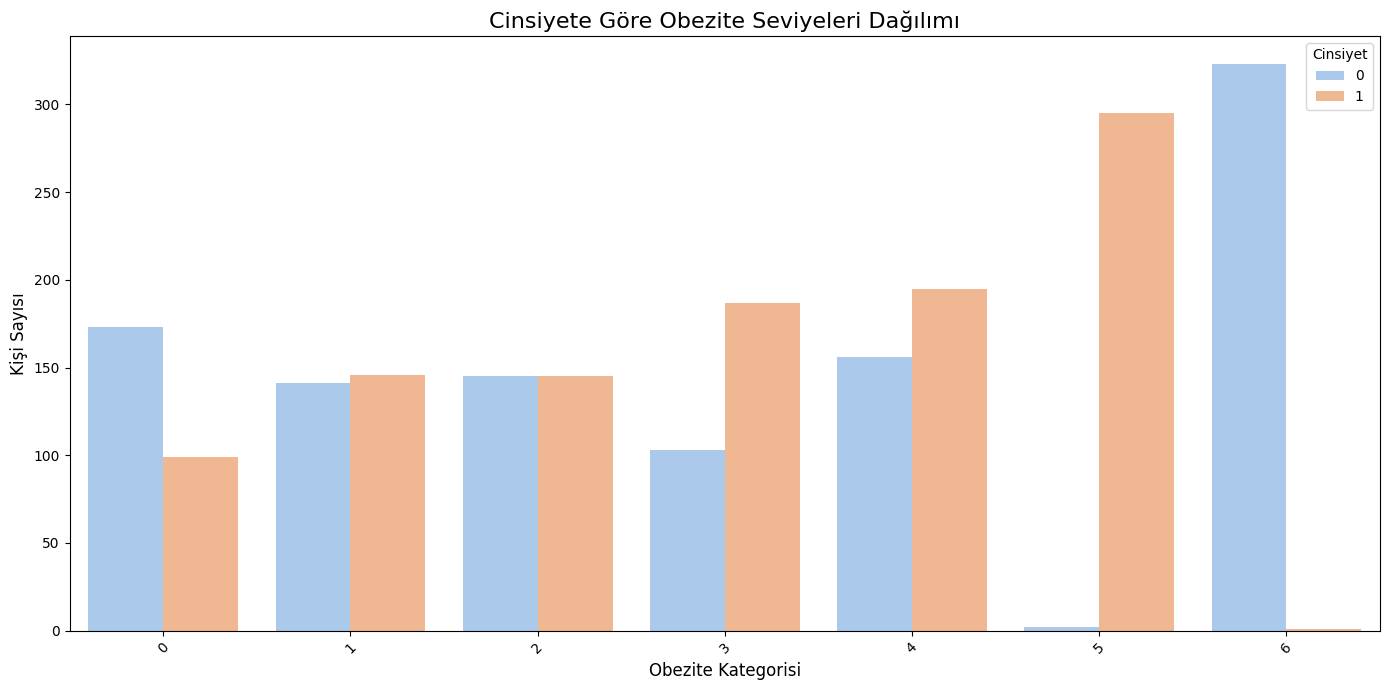

In [189]:
# Grafik alanını oluştur
plt.figure(figsize=(14, 7))

# Cinsiyete göre gruplandırılmış countplot
# x ekseninde obezite seviyeleri, renk ayrımında (hue) cinsiyet
sns.countplot(x='Obesity', hue='Gender', data=df, palette='pastel')

# Görsel düzenlemeler
plt.title('Cinsiyete Göre Obezite Seviyeleri Dağılımı', fontsize=16)
plt.xlabel('Obezite Kategorisi', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.xticks(rotation=45) # Kategori isimlerini 45 derece eğerek okunurluğu artırır
plt.legend(title='Cinsiyet')

plt.tight_layout()
plt.show()

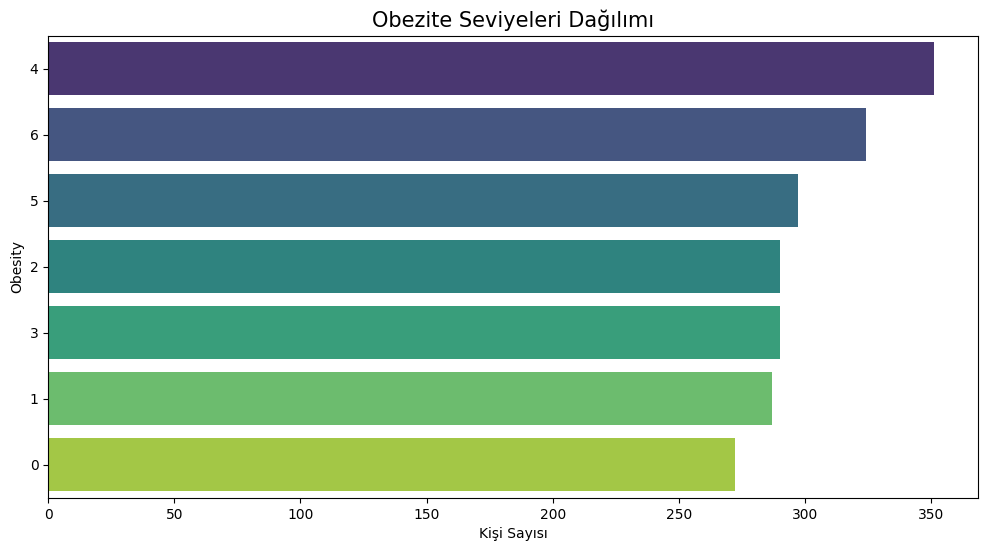

In [190]:
plt.figure(figsize=(12, 6))
# Veriyi çoktan aza doğru sıralayarak çizdiriyoruz
order = df['Obesity'].value_counts().index

sns.countplot(y='Obesity', data=df, order=order, palette='viridis')

plt.title('Obezite Seviyeleri Dağılımı', fontsize=15)
plt.xlabel('Kişi Sayısı')
plt.show()

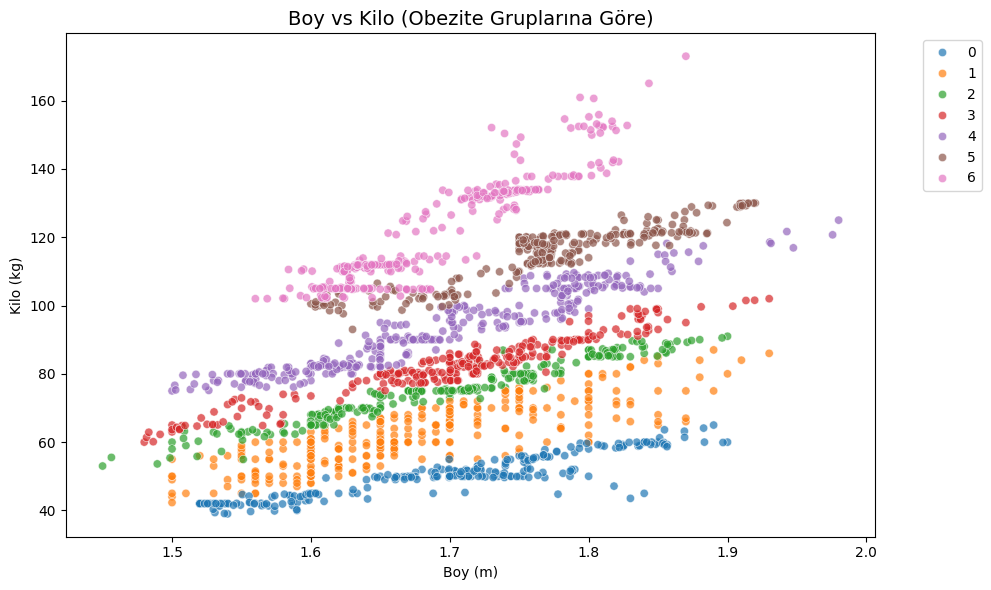

In [191]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Obesity', data=df, palette='tab10', alpha=0.7)

plt.title('Boy vs Kilo (Obezite Gruplarına Göre)', fontsize=14)
plt.xlabel('Boy (m)')
plt.ylabel('Kilo (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

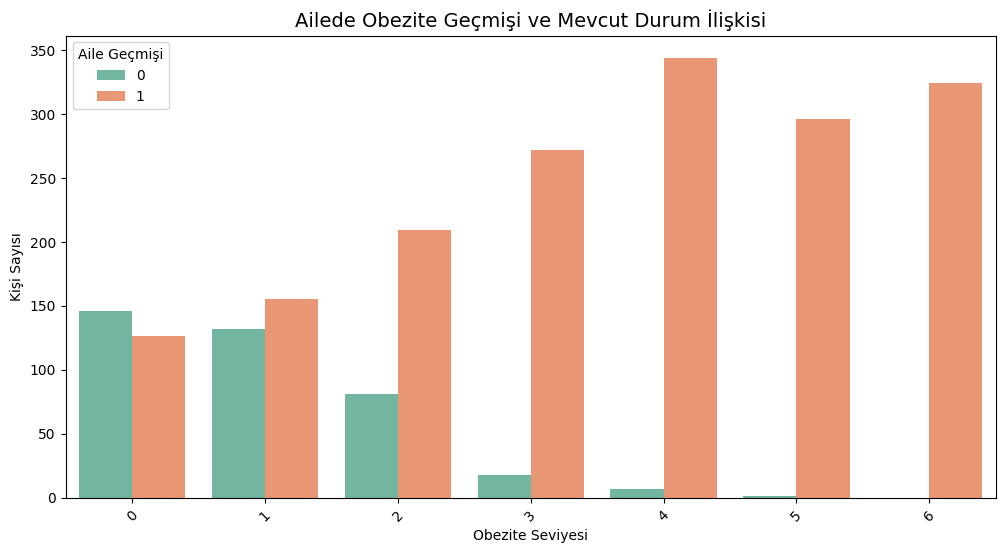

In [192]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Obesity', hue='family_history', data=df, palette='Set2')

plt.title('Ailede Obezite Geçmişi ve Mevcut Durum İlişkisi', fontsize=14)
plt.xticks(rotation=45) # Kategori isimlerini eğik yazar
plt.xlabel('Obezite Seviyesi')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Aile Geçmişi')
plt.show()

# Correlation Heatmaps

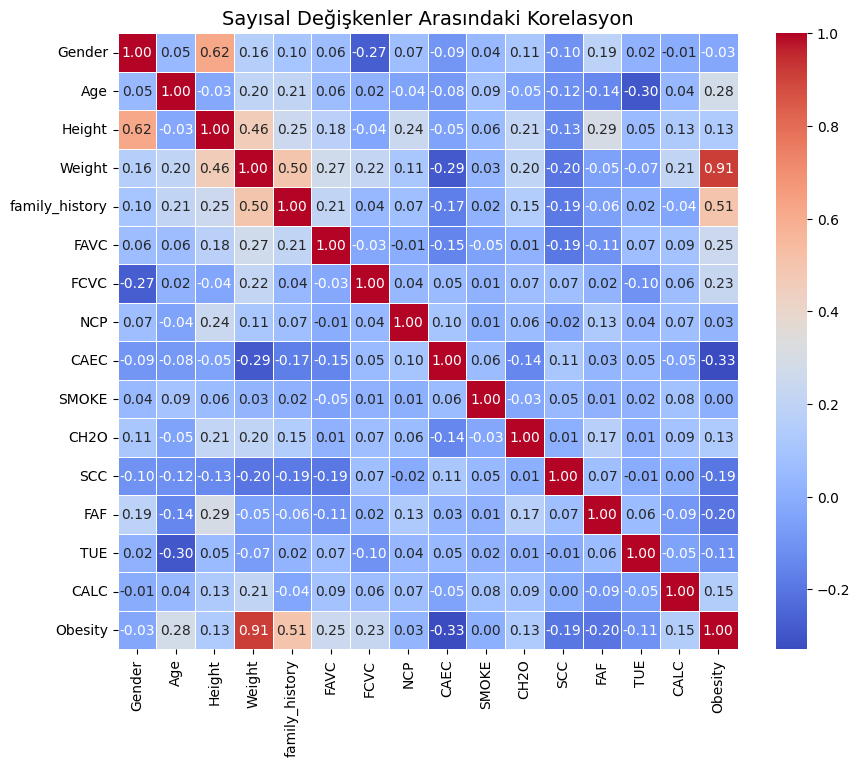

In [193]:
# Sadece sayısal kolonları seçiyoruz
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Sayısal Değişkenler Arasındaki Korelasyon', fontsize=14)
plt.show()

# Dropping Columns

In [194]:
# SMOKE, Gender ve NCP kolonlarını kaldırıyoruz
df = df.drop(columns=['SMOKE', 'Gender', 'NCP'])

In [195]:
df.head()

,Age,Height,Weight,family_history,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,Obesity,Trans_Automobile,Trans_Bike,Trans_Motorbike,Trans_Public_Transportation,Trans_Walking
0,21.0,1.62,64.0,1,0,2.0,1,2.0,0,0.0,1.0,0,1,False,False,False,True,False
1,21.0,1.52,56.0,1,0,3.0,1,3.0,1,3.0,0.0,1,1,False,False,False,True,False
2,23.0,1.80,77.0,1,0,2.0,1,2.0,0,2.0,1.0,2,1,False,False,False,True,False
3,27.0,1.80,87.0,0,0,3.0,1,2.0,0,2.0,0.0,2,2,False,False,False,False,True
4,22.0,1.78,89.8,0,0,2.0,1,2.0,0,0.0,0.0,1,3,False,False,False,True,False


# Train Test Split

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 6. Veriyi Eğitim ve Test Setlerine Ayırma
X = df.drop('Obesity', axis=1)
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [198]:
y_pred = rfc.predict(X_test)

In [199]:
from sklearn.metrics import accuracy_score
print(f'Model accuracy score with 10 decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with 10 decision-trees : 0.8959810874704491


In [200]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[54  2  0  0  0  0  0]
 [ 5 48  6  2  1  0  0]
 [ 0  7 47  2  0  0  0]
 [ 1  0  8 39  2  0  0]
 [ 0  3  0  2 70  2  1]
 [ 0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0 63]]


In [201]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        56
           1       0.80      0.77      0.79        62
           2       0.77      0.84      0.80        56
           3       0.87      0.78      0.82        50
           4       0.96      0.90      0.93        78
           5       0.97      1.00      0.98        58
           6       0.98      1.00      0.99        63

    accuracy                           0.90       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.90      0.90      0.90       423



# Hyperparameter Tuning

In [202]:
## Hyperparameter Tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [203]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [204]:
y_pred = rscv.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with default decision-trees : 0.9598108747044918


In [205]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 8,
 'max_depth': None}

In [206]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.91      0.94      0.92        62
           2       0.91      0.91      0.91        56
           3       1.00      1.00      1.00        50
           4       0.97      0.94      0.95        78
           5       0.97      0.97      0.97        58
           6       0.98      1.00      0.99        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [207]:
print(confusion_matrix(y_test, y_pred))

[[55  1  0  0  0  0  0]
 [ 1 58  3  0  0  0  0]
 [ 0  5 51  0  0  0  0]
 [ 0  0  0 50  0  0  0]
 [ 0  0  2  0 73  2  1]
 [ 0  0  0  0  2 56  0]
 [ 0  0  0  0  0  0 63]]
